In [1]:
import numpy as np
import pandas as pd
import category_encoders as ce
import sys, os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_handler import FileHandler
from df_selector import *
from df_cleaner import *
from df_visualizer import *

In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

# Reading Data

In [4]:
file_handler = FileHandler()

In [5]:
# reading the store csv file

missing_values=["n/a", "na", "undefined"]
df = pd.read_csv("../data/data.csv", na_values=missing_values)
            
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,TransactionYear,TransactionMonth,TransactionDay,TransactionHour
0,1.097926,-0.015563,0.153713,1.668646,0.595070,1.025848,0.554336,-0.799047,0.676000,-0.046371,-0.072291,-0.349252,-0.044962,-0.994246,0.848684,-0.100739,-2.155530
1,1.013589,-0.571733,0.867190,0.346449,0.595070,-0.502027,-0.304790,0.491064,-1.114302,-0.054643,-0.080251,-0.349252,-0.044962,-0.994246,0.848684,-0.100739,-2.155530
2,-0.287613,0.469994,0.371965,-1.203089,0.807169,1.025848,-1.378697,-0.799047,0.676000,-0.050426,-0.076352,-0.349252,-0.044962,-0.994246,0.848684,-0.100739,-2.155530
3,0.032862,-1.666100,0.996380,-1.227972,1.692827,-2.793841,2.916933,4.361398,0.676000,0.107717,0.096648,-0.349252,-0.044962,-0.994246,0.848684,-0.100739,-1.949214
4,-0.234164,0.056072,0.867190,0.346449,1.692827,-0.502027,-0.304790,0.491064,-1.114302,-0.059704,-0.075183,-0.349252,-0.044962,-0.994246,0.848684,-0.100739,-1.949214


# Data preparation

## Data separation as x and y

In [6]:
y = df['PricingStrategy']

In [7]:
y

0       -0.349252
1       -0.349252
2       -0.349252
3       -0.349252
4       -0.349252
           ...   
95657   -0.349252
95658   -0.349252
95659   -0.349252
95660   -0.349252
95661   -0.349252
Name: PricingStrategy, Length: 95662, dtype: float64

In [8]:
x = df.drop('PricingStrategy', axis=1)
x

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,FraudResult,TransactionYear,TransactionMonth,TransactionDay,TransactionHour
0,1.097926,-0.015563,0.153713,1.668646,0.595070,1.025848,0.554336,-0.799047,0.676000,-0.046371,-0.072291,-0.044962,-0.994246,0.848684,-0.100739,-2.155530
1,1.013589,-0.571733,0.867190,0.346449,0.595070,-0.502027,-0.304790,0.491064,-1.114302,-0.054643,-0.080251,-0.044962,-0.994246,0.848684,-0.100739,-2.155530
2,-0.287613,0.469994,0.371965,-1.203089,0.807169,1.025848,-1.378697,-0.799047,0.676000,-0.050426,-0.076352,-0.044962,-0.994246,0.848684,-0.100739,-2.155530
3,0.032862,-1.666100,0.996380,-1.227972,1.692827,-2.793841,2.916933,4.361398,0.676000,0.107717,0.096648,-0.044962,-0.994246,0.848684,-0.100739,-1.949214
4,-0.234164,0.056072,0.867190,0.346449,1.692827,-0.502027,-0.304790,0.491064,-1.114302,-0.059704,-0.075183,-0.044962,-0.994246,0.848684,-0.100739,-1.949214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,1.456605,1.642207,0.867190,0.346449,-0.436764,-0.502027,-0.304790,0.491064,-1.114302,-0.062591,-0.072291,-0.044962,1.005787,-0.874040,-0.323884,-0.711319
95658,1.502341,-0.044970,-0.272024,-0.803828,0.184247,1.025848,0.554336,-0.799047,0.676000,-0.046371,-0.072291,-0.044962,1.005787,-0.874040,-0.323884,-0.711319
95659,1.250741,-1.224306,0.867190,0.346449,0.184247,-0.502027,-0.304790,0.491064,-1.114302,-0.054643,-0.080251,-0.044962,1.005787,-0.874040,-0.323884,-0.711319
95660,-0.734178,0.935460,-1.993569,1.452615,-1.375924,1.025848,2.487370,3.716343,0.676000,-0.030151,-0.056047,-0.044962,1.005787,-0.874040,-0.323884,-0.505004


## Data splitting

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [10]:
X_train

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,FraudResult,TransactionYear,TransactionMonth,TransactionDay,TransactionHour
68621,-0.022361,1.223500,-0.664485,-1.724502,-0.188359,1.025848,-0.949134,-0.799047,0.676000,-0.046371,-0.072291,-0.044962,1.005787,-1.065454,0.791842,-1.742898
72085,1.450087,-0.771808,-1.688213,1.439043,-1.103635,0.261910,1.628244,0.491064,0.676000,0.026618,0.000807,-0.044962,1.005787,-1.065454,1.014987,-0.092372
44452,-1.606305,-0.342069,-1.853614,0.306862,-1.250766,1.025848,0.554336,-0.799047,0.676000,-0.050426,-0.076352,-0.044962,-0.994246,1.040098,1.349705,0.113944
84496,-1.121536,-0.468572,-0.214280,-1.897553,1.389009,1.025848,0.554336,-0.799047,0.676000,-0.050426,-0.076352,-0.044962,1.005787,-0.874040,-1.439610,0.939207
54726,-0.916324,-1.212909,-0.645890,-1.255117,-0.170207,1.025848,-0.949134,-0.799047,0.676000,-0.050426,-0.076352,-0.044962,1.005787,-1.065454,-0.881747,0.320259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,-0.019174,0.676426,0.867190,0.346449,-0.017343,-0.502027,-0.304790,0.491064,-1.114302,-0.054562,-0.080332,-0.044962,1.005787,-1.065454,0.345552,0.526575
77655,-0.993527,0.228092,0.867190,0.346449,-0.793129,-0.502027,-0.304790,0.491064,-1.114302,-0.054530,-0.080364,-0.044962,1.005787,-1.065454,1.461278,1.145522
79683,-1.060918,1.160083,0.615663,-0.157999,1.553338,1.025848,-0.949134,-0.799047,0.676000,-0.046371,-0.072291,-0.044962,1.005787,-1.065454,1.684423,1.145522
56088,-0.904953,-1.583506,-1.025628,0.369070,-0.522750,0.261910,-0.949134,-0.799047,0.676000,0.026618,0.000807,-0.044962,1.005787,-1.065454,-0.547029,-1.949214


In [11]:
X_test

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,FraudResult,TransactionYear,TransactionMonth,TransactionDay,TransactionHour
72936,0.364672,-0.181264,0.867190,0.346449,0.154630,-0.502027,-0.304790,0.491064,-1.114302,-0.055495,-0.079398,-0.044962,1.005787,-1.065454,1.014987,0.939207
59006,0.299925,-1.606739,0.075417,1.478630,0.517683,-1.265965,-0.949134,-0.799047,0.676000,-0.046371,-0.072291,-0.044962,1.005787,-1.065454,-0.323884,-1.330267
72145,-1.312953,1.380871,-1.105882,1.141577,-0.593450,1.025848,0.554336,-0.799047,0.676000,-0.046095,-0.072015,-0.044962,1.005787,-1.065454,1.014987,0.113944
40642,-0.136827,-1.227886,-1.565874,1.555541,-0.997585,1.025848,-0.949134,-0.799047,0.676000,-0.038261,-0.064169,-0.044962,-0.994246,1.040098,1.126560,-1.330267
24201,-1.502522,-0.138998,-0.035177,1.112170,0.413544,0.261910,-0.949134,-0.799047,0.676000,-0.038261,-0.064169,-0.044962,-0.994246,1.040098,-0.435456,0.526575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42462,-1.151448,1.215025,0.867190,0.346449,0.918951,-0.502027,-0.304790,0.491064,-1.114302,-0.054887,-0.080007,-0.044962,-0.994246,1.040098,1.238132,0.526575
19194,-1.361766,0.340641,-0.411979,0.645046,0.052402,-2.793841,1.628244,0.491064,0.676000,0.026618,0.000807,-0.044962,-0.994246,1.040098,-0.993319,-0.711319
42902,1.267326,-1.609479,0.867190,0.346449,0.953346,-0.502027,-0.304790,0.491064,-1.114302,-0.058130,-0.076758,-0.044962,-0.994246,1.040098,1.238132,1.351838
51750,-0.179303,0.336477,1.168632,0.814704,-1.726557,1.025848,-0.949134,-0.799047,0.676000,-0.046371,-0.072291,-0.044962,1.005787,-1.065454,-1.104892,0.732891


## Model Building

### Linear Regression

#### Training the model

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### Applying the model to make a prediction

In [13]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [14]:
y_lr_train_pred

array([-0.00398948, -0.34099248, -0.30966208, ...,  0.12209453,
        0.47233466, -0.03668208])

In [15]:
y_lr_test_pred

array([-0.25870327,  0.97617239, -0.19658971, ..., -0.16375922,
       -0.13476622, -0.08702142])

### Evaluate model performance

In [16]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [17]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)
     

LR MSE (Train):  0.7082060931983405
LR R2 (Train):  0.29069180780703463
LR MSE (Test):  0.7545070334855308
LR R2 (Test):  0.25015307402888676


In [19]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.708206,0.290692,0.754507,0.250153


## Random Forest

### Training the model

In [21]:
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Applying the model to make a prediction

In [22]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### Evaluate model performance

In [23]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [24]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.665816,0.333147,0.672866,0.33129


## Model comparison

In [25]:
df_models = pd.concat([lr_results, rf_results], axis=0)

In [27]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.708206,0.290692,0.754507,0.250153
1,Random forest,0.665816,0.333147,0.672866,0.33129


# Data visualization of prediction results

Text(0.5, 0, 'Experimental')

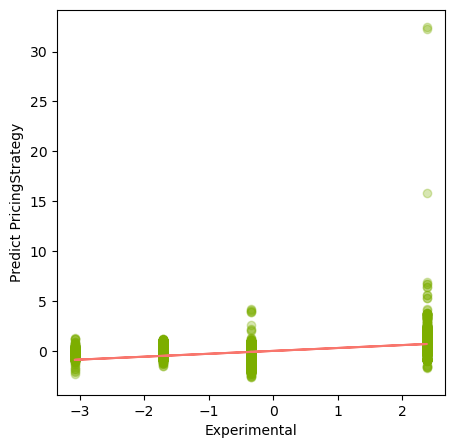

In [29]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict PricingStrategy')
plt.xlabel('Experimental')